# 1) Delivery_time -> Predict delivery time using sorting time. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# Importing necessary libraries
import pandas as pd    # for reading and manipulating dataframes
import numpy as np     # for array manipulation
import warnings        # Filtering any warning message from the subsequent noebooks
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Linear Regression\delivery_time.csv')

In [2]:
# Exploring the data
df.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Performing Exploratory Data Analysis

In [3]:
# Check for any missing values
print(df.isnull().sum())

Delivery Time    0
Sorting Time     0
dtype: int64


In [17]:
# Exploring the number of null values and columns' types in train set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
# Figuring out whether there are duplicate rows
print(df.duplicated().sum())

0


# Data Distribution before Modelling

In [8]:
# Extracting independent and dependent variables
X = df[['Sorting Time']]
y = df['Delivery Time']

# Applying a logarithmic transformation to Sorting Time

In [9]:
df['Log_Sorting Time'] = np.log(df['Sorting Time'])
X = df[['Log_Sorting Time']]
y = df['Delivery Time']
df.head(2)

,Delivery Time,Sorting Time,Log_Sorting Time
0,21.0,10,2.302585
1,13.5,4,1.386294


# Applying an exponential transformation to Sorting Time

In [10]:
df['Exp_Sorting Time'] = np.exp(df['Sorting Time'])
X = df[['Exp_Sorting Time']]
y = df['Delivery Time']
df.head(2)

,Delivery Time,Sorting Time,Log_Sorting Time,Exp_Sorting Time
0,21.0,10,2.302585,22026.465795
1,13.5,4,1.386294,54.598150


In [11]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head(2)

,Delivery Time,Sorting Time,Log_Sorting Time,Exp_Sorting Time
0,21.0,10,2.302585,22026.465795
1,13.5,4,1.386294,54.598150


# Building and Training The Linear Regression Model

In [12]:
# Importing linear regression library
from sklearn.linear_model import LinearRegression   
model = LinearRegression()
model.fit(X_train, y_train)   # Initiating the linear model

LinearRegression()

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Data Visualisation

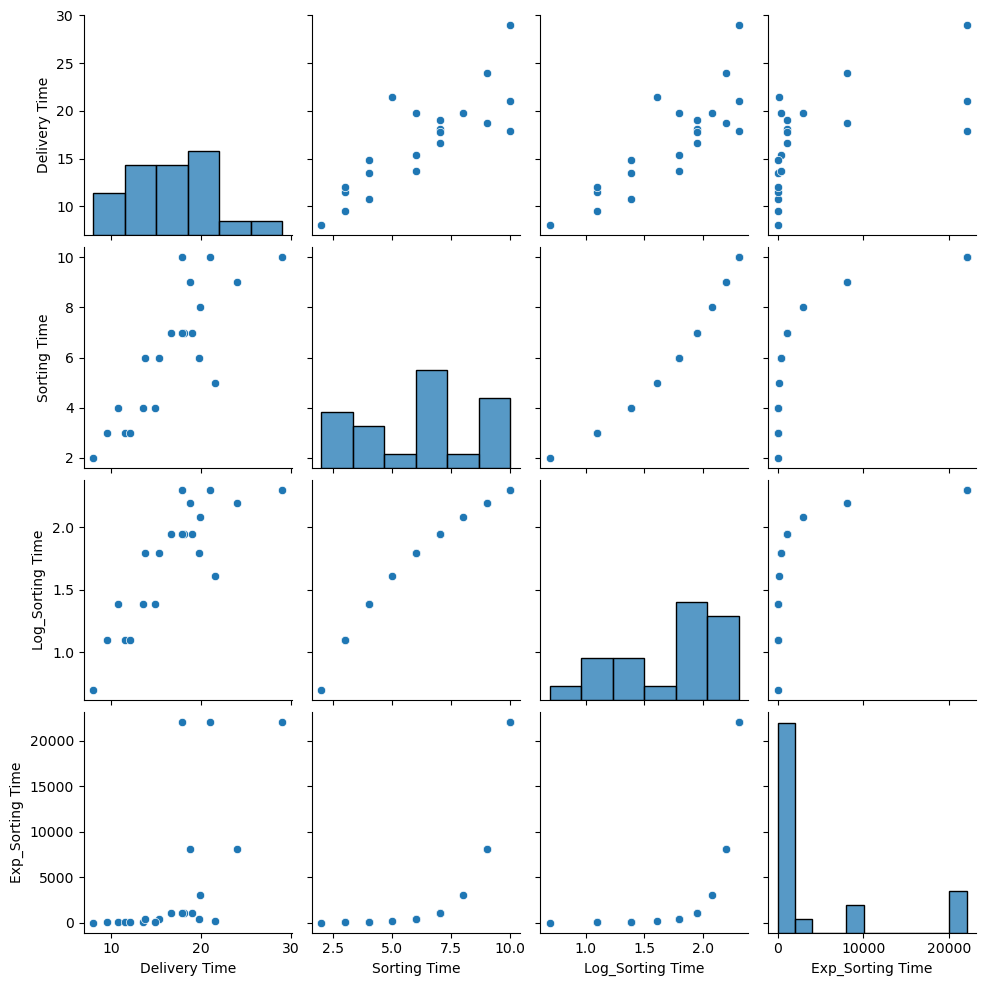

In [14]:
# Importing visualization libraries
import matplotlib.pyplot as plt    

# Seaborn visualization library    
import seaborn as sns      # for building visualizations
# Create the default pairplot
sns.pairplot(df)          # Figuring out the distribution of training set features

In [26]:
# Figure out the correlation among variables
df.corr()

,Delivery Time,Sorting Time,Log_Sorting Time,Exp_Sorting Time
Delivery Time,1.000000,0.825997,0.833933,0.600931
Sorting Time,0.825997,1.000000,0.977447,0.773564
Log_Sorting Time,0.833933,0.977447,1.000000,0.653812
Exp_Sorting Time,0.600931,0.773564,0.653812,1.000000


# Plotting and estimating the Delivery Time

Mean Squared Error: 51.82725911766278
Mean Absolute Error: 5.247796830231951
Root Mean Absolute Error: 2.2908070259696585
Predicted Delivery Time for Sorting Time 3: 14.627771423168412


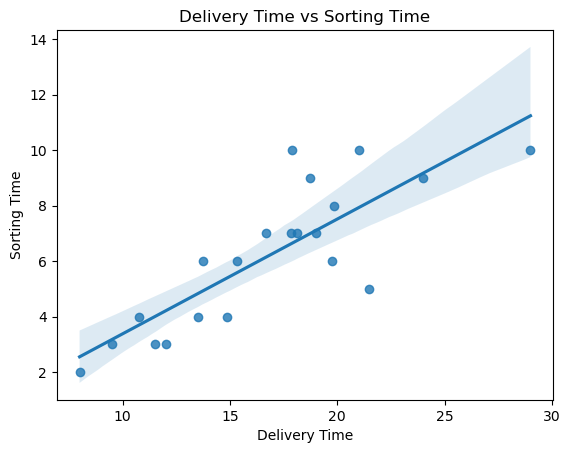

Intercept: 14.625604799379715
Coefficient: 0.0007222079295654116


In [15]:
# Importing model evauluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Measuring each model MSE, MAE and RMSE 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
rmse = np.sqrt(mean_absolute_error(y_test, y_pred))
print(f'Root Mean Absolute Error: {rmse}')

# Predict delivery time for a new sorting time
new_sorting_time = np.array([[3]])  # Adjust the sorting time as needed
predicted_delivery_time = model.predict(new_sorting_time)
print(f'Predicted Delivery Time for Sorting Time {new_sorting_time[0][0]}: {predicted_delivery_time[0]}')

# Plotting the relationship between actual and perdicted prices for linear model
fig = sns.regplot(x="Delivery Time", y="Sorting Time", data=df)
plt.title("Delivery Time vs Sorting Time")
plt.show()

# Display the model coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])

# 2) Salary_hike -> Build a prediction model for Salary_hike.

In [16]:
# Importing necessary libraries
import pandas as pd    # for reading and manipulating dataframes
import numpy as np     # for array manipulation
import warnings        # Filtering any warning message from the subsequent noebooks
warnings.filterwarnings("ignore")

# Reading the dataset
df = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Linear Regression\Salary_data.csv')
df.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [29]:
# Checking for null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [30]:
# # Exploring the number of null values and columns' types in train set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [31]:
# Checking any duplicate rows
print(df.duplicated().sum())

0



# Data Preparation

In [42]:
# Extracting independent and dependent variables
X = df[['YearsExperience']]
y = df['Salary']

# Applying square root transformation to YearsExperience

In [17]:
df['Sqrt_YearsExperience'] = df['YearsExperience'] ** 0.5
X = df[['Sqrt_YearsExperience']]
y = df['Salary']

# Applying reciprocal transformation to YearsExperience

In [18]:
df['Reciprocal_YearsExperience'] = 1 / df['YearsExperience']
X = df[['Reciprocal_YearsExperience']]
y = df['Salary']

In [19]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head(2)

,YearsExperience,Salary,Sqrt_YearsExperience,Reciprocal_YearsExperience
0,1.1,39343.0,1.048809,0.909091
1,1.3,46205.0,1.140175,0.769231


# Building and Training The Linear Regression Model

In [20]:
# Importing linear regression library
from sklearn.linear_model import LinearRegression   
model = LinearRegression()
model.fit(X_train, y_train)   # Initiating the linear model

LinearRegression()

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Data Visualisation

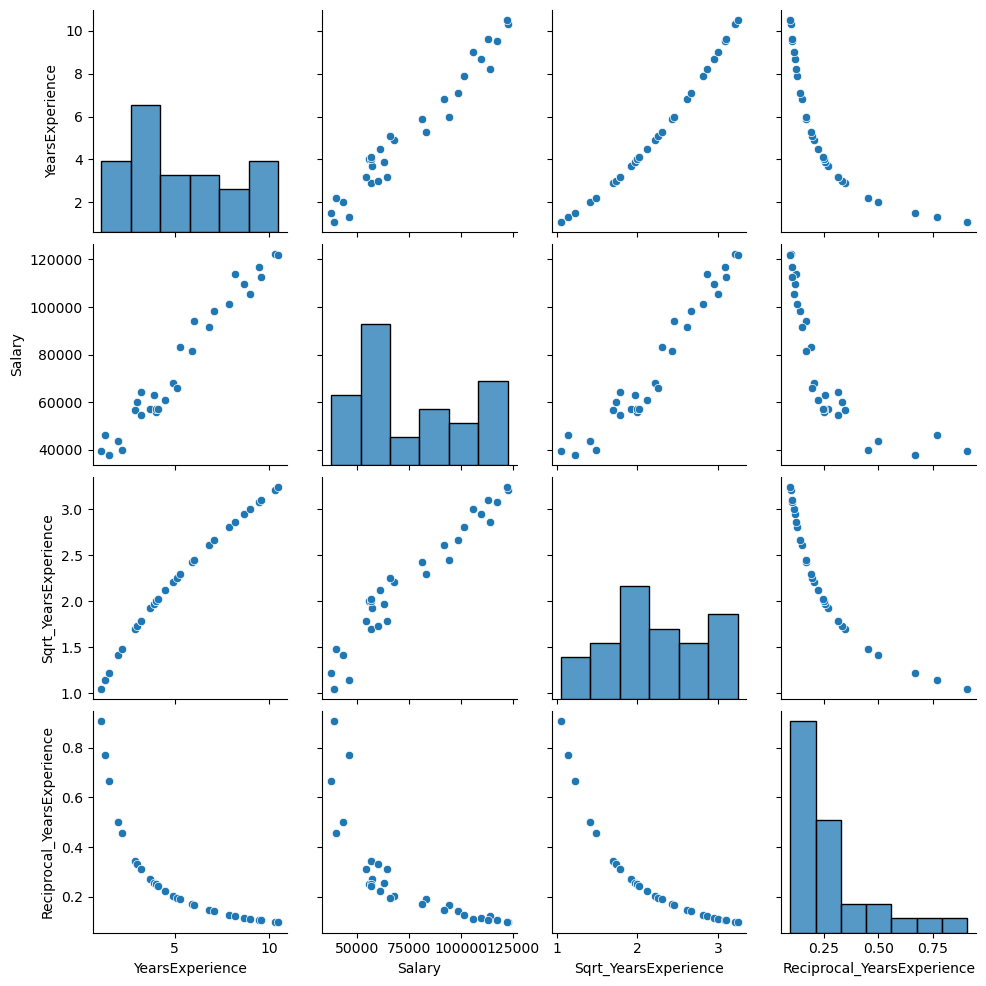

In [38]:
# Importing visualization libraries
import matplotlib.pyplot as plt    

# Seaborn visualization library    
import seaborn as sns      # for building visualizations
# Create the default pairplot
sns.pairplot(df)          # Figuring out the distribution of training set features

In [39]:
# Figure out the correlation among variables
df.corr()

,YearsExperience,Salary,Sqrt_YearsExperience,Reciprocal_YearsExperience
YearsExperience,1.000000,0.978242,0.989850,-0.807463
Salary,0.978242,1.000000,0.964884,-0.767200
Sqrt_YearsExperience,0.989850,0.964884,1.000000,-0.879833
Reciprocal_YearsExperience,-0.807463,-0.767200,-0.879833,1.000000


# PLotting and estimating Salary

Mean Squared Error: 261574833.36025193
Mean Absolute Error: 14280.569970973322
Root Mean Absolute Error: 119.50133878318402
Predicted Salary for Yearsexperience 4: -291601.90719643986


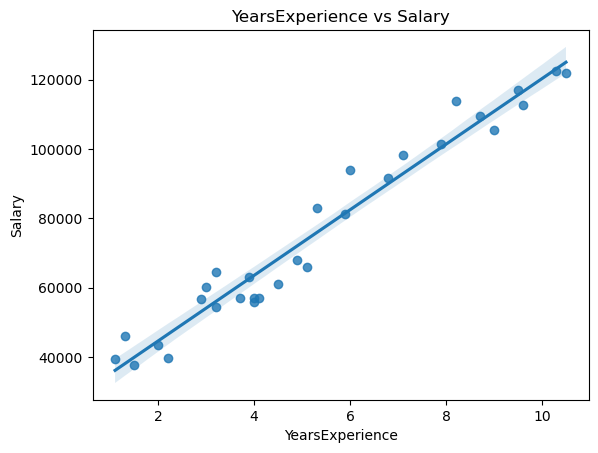

Intercept: 102904.22592717205
Coefficient: -98626.53328090298


In [40]:
# Importing model evauluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Measuring each model MSE, MAE and RMSE 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
rmse = np.sqrt(mean_absolute_error(y_test, y_pred))
print(f'Root Mean Absolute Error: {rmse}')

# Predicting Salary hike
new_yearsexperience = np.array([[4]])  # Adjust the sorting time as needed
predicted_salary_hike = model.predict(new_yearsexperience)
print(f'Predicted Salary for Yearsexperience {new_yearsexperience[0][0]}: {predicted_salary_hike[0]}')

# Plotting the relationship between actual and perdicted prices for linear model
fig = sns.regplot(x="YearsExperience", y="Salary", data=df)
plt.title("YearsExperience vs Salary")
plt.show()

# Display the model coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])